CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
cuda = torch.cuda.is_available() #Check the GPU is available 
device = torch.device("cuda" if cuda else "cpu") #device to attach CUDA 
device

device(type='cuda')

CODE BLOCK: 3

In [3]:
# Train data transformations
from utils import train_data, test_data 

CODE BLOCK: 4

CODE BLOCK: 5

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'num_workers': 12, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data,  shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

CODE BLOCK: 6

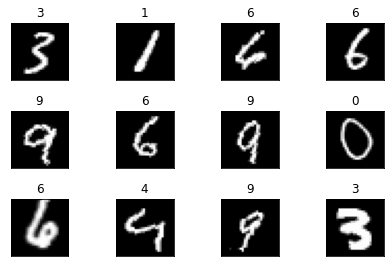

In [5]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [6]:
from model import Net

In [7]:
from torchsummary import summary 
#model = FirstDNN().to(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 592,720
Trainable params: 592,720
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from utils import GetCorrectPredCount,train,test

CODE BLOCK: 10

In [10]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size= 15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer)
    test(model, device, train_loader)
    scheduler.step()

  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.3630, Accuracy: 53372/60000 (88.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.1545, Accuracy: 57078/60000 (95.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.1066, Accuracy: 58020/60000 (96.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0811, Accuracy: 58497/60000 (97.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0717, Accuracy: 58643/60000 (97.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0696, Accuracy: 58729/60000 (97.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0565, Accuracy: 58935/60000 (98.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0510, Accuracy: 59065/60000 (98.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0489, Accuracy: 59111/60000 (98.52%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0453, Accuracy: 59157/60000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0434, Accuracy: 59196/60000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0395, Accuracy: 59256/60000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0355, Accuracy: 59341/60000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0355, Accuracy: 59349/60000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0364, Accuracy: 59313/60000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0286, Accuracy: 59451/60000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0278, Accuracy: 59459/60000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0281, Accuracy: 59450/60000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0278, Accuracy: 59474/60000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0506 Batch_id=117 Accuracy=99.13: 100%|████████████████████████████████| 118/118 [00:06<00:00, 19.15it/s]


Test set: Average loss: 0.0267, Accuracy: 59510/60000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

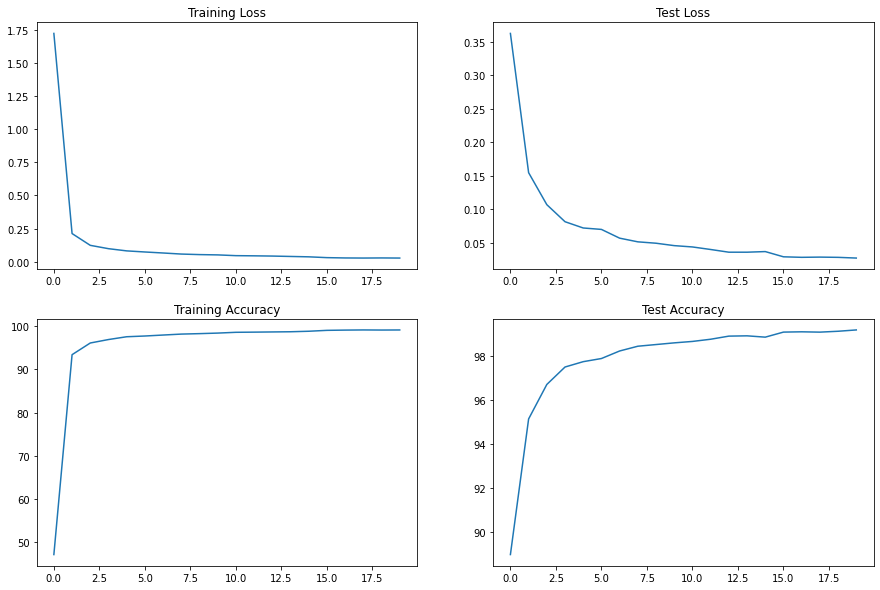

In [15]:
from utils import train_losses, test_losses, train_acc, test_acc


fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 592,720
Trainable params: 592,720
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
